# Decision Tree Classification:

- This works in specific flows [tree structure] inorder to perform the classification.
- simple & easy to visualization.
- This forms the following nodes:

1. Root Node: Starting point [representating the entire dataset].
2. Internal Nodes: These are decisions made on a feature.
3. Branches: Result of the descision [Flow from one decision to another].
4. Leaf Nodes: Represents the class labels.


Use Cases & Adv.:

- No need to normalize or standardize the data as Decision Tree is kinda non parametric based algorithm.
- This can handle unrelated, noisy or correlated features very well.


Disadv.:
- Overfitting issues. [fixes: setting `max_depth`]
- Small changes may lead to change in entire tree structure.

Not to Use when:
- Very small datasets with high feature cnt.
- Inconsistent data or smooth/probabilistic output.


In [35]:
import numpy as np, pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [72]:
data = load_iris()
X, y = data.data, data.target

# data = pd.read_csv('./datasets/cricket_knn_indian_players_balanced.csv')
# data

# X = data[['temperature', 'opposition_strength']]
# y = data['best_batter']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)


In [73]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.662\nsamples = 75\nvalue = [21.0, 27.0, 27.0]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.46153846153846156, 0.8, 'True  '),
 Text(0.5769230769230769, 0.7, 'x[2] <= 5.05\ngini = 0.5\nsamples = 54\nvalue = [0, 27, 27]'),
 Text(0.5384615384615384, 0.8, '  False'),
 Text(0.3076923076923077, 0.5, 'x[3] <= 1.6\ngini = 0.231\nsamples = 30\nvalue = [0, 26, 4]'),
 Text(0.15384615384615385, 0.3, 'x[2] <= 4.95\ngini = 0.077\nsamples = 25\nvalue = [0, 24, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[1] <= 2.9\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[1] <= 2.75\ngin

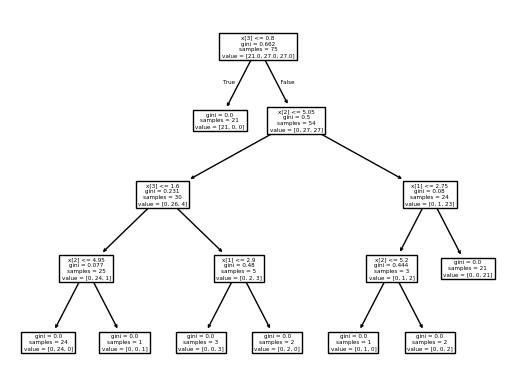

In [74]:
tree.plot_tree(dt_model)

In [75]:
from sklearn.metrics import classification_report


y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



In [77]:
X[0]

array([5.1, 3.5, 1.4, 0.2])